Prepare data for machine learning

In [1]:
from dataPrep import prepJoinedNursingHomeData
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import sparse
from sklearn.decomposition import PCA
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
nursingHomeDF = prepJoinedNursingHomeData()
#nursingHomeDF.drop((nursingHomeDF.loc[(nursingHomeDF["InfectionScore"] == "Not Available") & (nursingHomeDF["FacilityReadmissionScore"] == "Not Available")]).index, inplace = True)
nursingHomeDF.drop((nursingHomeDF.loc[(nursingHomeDF["FacilityReadmissionScore"] == "Not Available")]).index, inplace = True)

trainDF, testDF = train_test_split(nursingHomeDF, test_size = 0.3, random_state=0)

In [3]:
trainDF.drop((trainDF.loc[(trainDF["InfectionScore"] == "Not Available") & (trainDF["FacilityReadmissionScore"] == "Not Available")]).index, inplace = True)

First off we have too many columns to be easily human parsable, but as most of them are from one dataset we can ignore them for now and work on those few columns from other datasets

In [4]:
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6713 entries, 345538 to 155812
Data columns (total 89 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FacilityReadmissionScore              6713 non-null   object 
 1   InfectionScore                        6713 non-null   object 
 2   Q1MeasureScore401                     6037 non-null   float64
 3   Q2MeasureScore401                     6060 non-null   float64
 4   Q3MeasureScore401                     6066 non-null   float64
 5   Q4MeasureScore401                     6068 non-null   float64
 6   Q1MeasureScore404                     6028 non-null   float64
 7   Q2MeasureScore404                     6036 non-null   float64
 8   Q3MeasureScore404                     6030 non-null   float64
 9   Q4MeasureScore404                     6053 non-null   float64
 10  Q1MeasureScore405                     4165 non-null   float64
 11  Q2MeasureScore4

In [5]:
measureScoreColumns = trainDF.filter(like='Q').columns
noMeasureScoreColumns = list(set(trainDF.columns) - set(measureScoreColumns))

In [6]:
trainDF[noMeasureScoreColumns]

AdjustedScore521             FacilityReadmissionScore  \
FederalProviderNumber                                                          
345538                        20.467950  No Different than the National Rate   
075031                        27.648893        Better than the National Rate   
055776                        20.614823  No Different than the National Rate   
185446                        27.076113  No Different than the National Rate   
495019                        25.373948        Better than the National Rate   
...                                 ...                                  ...   
455725                              NaN  No Different than the National Rate   
675850                        22.661643  No Different than the National Rate   
305052                        15.997185  No Different than the National Rate   
195447                        24.007277  No Different than the National Rate   
155812                        21.382486        Better than the National Rate   

                       AdjustedScore522  ExpectedScore551  ExpectedScore522  \
FederalProviderNumber                                                         
345538                         9.147886          1.708739         10.805832   
075031                         7.873451          1.599745         10.639070   
055776                        12.391985          1.382307         10.676871   
185446                        15.728698          1.192825         10.935420   
495019                         7.337369          2.722090         10.431147   
...                                 ...               ...               ...   
455725                              NaN               NaN               NaN   
675850                         5.970959          1.378193         11.252374   
305052                         5.239294          1.326239         10.612769   
195447                        16.333821          1.496263         12.244527   
155812                        11.399705          1.894232          9.688422   

                       ExpectedScore552  CitationunderIIDR  AdjustedScore551  \
FederalProviderNumber                                                          
345538                         2.480128                0.0          1.065930   
075031                         1.983868                0.0          2.206419   
055776                         2.021282                0.0          0.937929   
185446                         1.786416                0.0          1.994340   
495019                         2.519108                0.0          1.285875   
...                                 ...                ...               ...   
455725                              NaN                0.0               NaN   
675850                         1.907563                0.0          2.357528   
305052                         1.902620                0.0          1.284790   
195447                         1.799645                0.0          1.119891   
155812                         2.250485                0.0          0.867101   

                       ComplaintDeficiency  paymentDenialCounts  \
FederalProviderNumber                                             
345538                                13.0                  1.0   
075031                                 1.0                  NaN   
055776                                47.0                  NaN   
185446                                 2.0                  NaN   
495019                                 4.0                  NaN   
...                                    ...                  ...   
455725                                13.0                  NaN   
675850                                 3.0                  NaN   
305052                                 2.0                  NaN   
195447                                 2.0                  NaN   
155812                                 4.0                  NaN   

                       InfectionControlIn

We will replace all NaN values in count columns with 0, under the assumption that if there was a penalty, it would have been reported.

In [7]:
countsColumns = ["fineCounts", "paymentDenialCounts", "StandardDeficiency", "ComplaintDeficiency", "InfectionControlInspectionDeficiency", "CitationunderIDR", "CitationunderIIDR"]
trainDF[countsColumns] = trainDF[countsColumns].fillna(0)

In [8]:
trainDF[noMeasureScoreColumns]

AdjustedScore521             FacilityReadmissionScore  \
FederalProviderNumber                                                          
345538                        20.467950  No Different than the National Rate   
075031                        27.648893        Better than the National Rate   
055776                        20.614823  No Different than the National Rate   
185446                        27.076113  No Different than the National Rate   
495019                        25.373948        Better than the National Rate   
...                                 ...                                  ...   
455725                              NaN  No Different than the National Rate   
675850                        22.661643  No Different than the National Rate   
305052                        15.997185  No Different than the National Rate   
195447                        24.007277  No Different than the National Rate   
155812                        21.382486        Better than the National Rate   

                       AdjustedScore522  ExpectedScore551  ExpectedScore522  \
FederalProviderNumber                                                         
345538                         9.147886          1.708739         10.805832   
075031                         7.873451          1.599745         10.639070   
055776                        12.391985          1.382307         10.676871   
185446                        15.728698          1.192825         10.935420   
495019                         7.337369          2.722090         10.431147   
...                                 ...               ...               ...   
455725                              NaN               NaN               NaN   
675850                         5.970959          1.378193         11.252374   
305052                         5.239294          1.326239         10.612769   
195447                        16.333821          1.496263         12.244527   
155812                        11.399705          1.894232          9.688422   

                       ExpectedScore552  CitationunderIIDR  AdjustedScore551  \
FederalProviderNumber                                                          
345538                         2.480128                0.0          1.065930   
075031                         1.983868                0.0          2.206419   
055776                         2.021282                0.0          0.937929   
185446                         1.786416                0.0          1.994340   
495019                         2.519108                0.0          1.285875   
...                                 ...                ...               ...   
455725                              NaN                0.0               NaN   
675850                         1.907563                0.0          2.357528   
305052                         1.902620                0.0          1.284790   
195447                         1.799645                0.0          1.119891   
155812                         2.250485                0.0          0.867101   

                       ComplaintDeficiency  paymentDenialCounts  \
FederalProviderNumber                                             
345538                                13.0                  1.0   
075031                                 1.0                  0.0   
055776                                47.0                  0.0   
185446                                 2.0                  0.0   
495019                                 4.0                  0.0   
...                                    ...                  ...   
455725                                13.0                  0.0   
675850                                 3.0                  0.0   
305052                                 2.0                  0.0   
195447                                 2.0                  0.0   
155812                                 4.0                  0.0   

                       InfectionControlIn

In [9]:
trainDF.shape

(6713, 89)

In [10]:
trainDF[noMeasureScoreColumns].isnull().sum()

AdjustedScore521                         109
FacilityReadmissionScore                   0
AdjustedScore522                         109
ExpectedScore551                        1027
ExpectedScore522                         109
ExpectedScore552                        1027
CitationunderIIDR                          0
AdjustedScore551                        1027
ComplaintDeficiency                        0
paymentDenialCounts                        0
InfectionControlInspectionDeficiency       0
StandardDeficiency                         0
InfectionScore                             0
fineCounts                                 0
AdjustedScore552                        1027
ExpectedScore521                         109
CitationunderIDR                           0
dtype: int64

In [11]:
noNA = (trainDF.isnull().sum() == 0).tolist()
hasNA = np.logical_not(noNA)

In [12]:
trainDF.loc[:,noNA].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6713 entries, 345538 to 155812
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FacilityReadmissionScore              6713 non-null   object 
 1   InfectionScore                        6713 non-null   object 
 2   fineCounts                            6713 non-null   float64
 3   paymentDenialCounts                   6713 non-null   float64
 4   StandardDeficiency                    6713 non-null   float64
 5   ComplaintDeficiency                   6713 non-null   float64
 6   InfectionControlInspectionDeficiency  6713 non-null   float64
 7   CitationunderIDR                      6713 non-null   float64
 8   CitationunderIIDR                     6713 non-null   float64
dtypes: float64(7), object(2)
memory usage: 524.5+ KB


In [13]:
trainDF.loc[:,hasNA].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6713 entries, 345538 to 155812
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Q1MeasureScore401  6037 non-null   float64
 1   Q2MeasureScore401  6060 non-null   float64
 2   Q3MeasureScore401  6066 non-null   float64
 3   Q4MeasureScore401  6068 non-null   float64
 4   Q1MeasureScore404  6028 non-null   float64
 5   Q2MeasureScore404  6036 non-null   float64
 6   Q3MeasureScore404  6030 non-null   float64
 7   Q4MeasureScore404  6053 non-null   float64
 8   Q1MeasureScore405  4165 non-null   float64
 9   Q2MeasureScore405  4041 non-null   float64
 10  Q3MeasureScore405  4200 non-null   float64
 11  Q4MeasureScore405  4231 non-null   float64
 12  Q1MeasureScore406  6118 non-null   float64
 13  Q2MeasureScore406  6123 non-null   float64
 14  Q3MeasureScore406  6125 non-null   float64
 15  Q4MeasureScore406  6144 non-null   float64
 16  Q1MeasureScore407  618

As the rest of the values are scores from an evaluation, there are multiple imputation options, the most obvious including mean or median imputation. In this case both options seem reasonable, but lets just go with mean imputation so that the mean of our scores doesn't change from imputation. The initial distributions can be seen below.

As scaleing features to a constant variance needs to be done before PCA (we have alot of features and likely can get rid of a few) and as KNN is a distance based algorithm it seems reasonable to perform some form of scaling before using KNN to impute, so first we will scale using a standard scaler to set variance to 1 and mean to 0.
While min/max scaling is ideal for KNN, 

In [14]:
#scale features using standard scaler
numerics = trainDF.select_dtypes(include='float64').columns
scaler = StandardScaler()
scaler.fit(trainDF[numerics])
trainDF[numerics] = scaler.transform(trainDF[numerics])

array([[<AxesSubplot:title={'center':'Q1MeasureScore401'}>,
        <AxesSubplot:title={'center':'Q2MeasureScore401'}>,
        <AxesSubplot:title={'center':'Q3MeasureScore401'}>,
        <AxesSubplot:title={'center':'Q4MeasureScore401'}>,
        <AxesSubplot:title={'center':'Q1MeasureScore404'}>,
        <AxesSubplot:title={'center':'Q2MeasureScore404'}>,
        <AxesSubplot:title={'center':'Q3MeasureScore404'}>,
        <AxesSubplot:title={'center':'Q4MeasureScore404'}>,
        <AxesSubplot:title={'center':'Q1MeasureScore405'}>],
       [<AxesSubplot:title={'center':'Q2MeasureScore405'}>,
        <AxesSubplot:title={'center':'Q3MeasureScore405'}>,
        <AxesSubplot:title={'center':'Q4MeasureScore405'}>,
        <AxesSubplot:title={'center':'Q1MeasureScore406'}>,
        <AxesSubplot:title={'center':'Q2MeasureScore406'}>,
        <AxesSubplot:title={'center':'Q3MeasureScore406'}>,
        <AxesSubplot:title={'center':'Q4MeasureScore406'}>,
        <AxesSubplot:title={'center':'Q

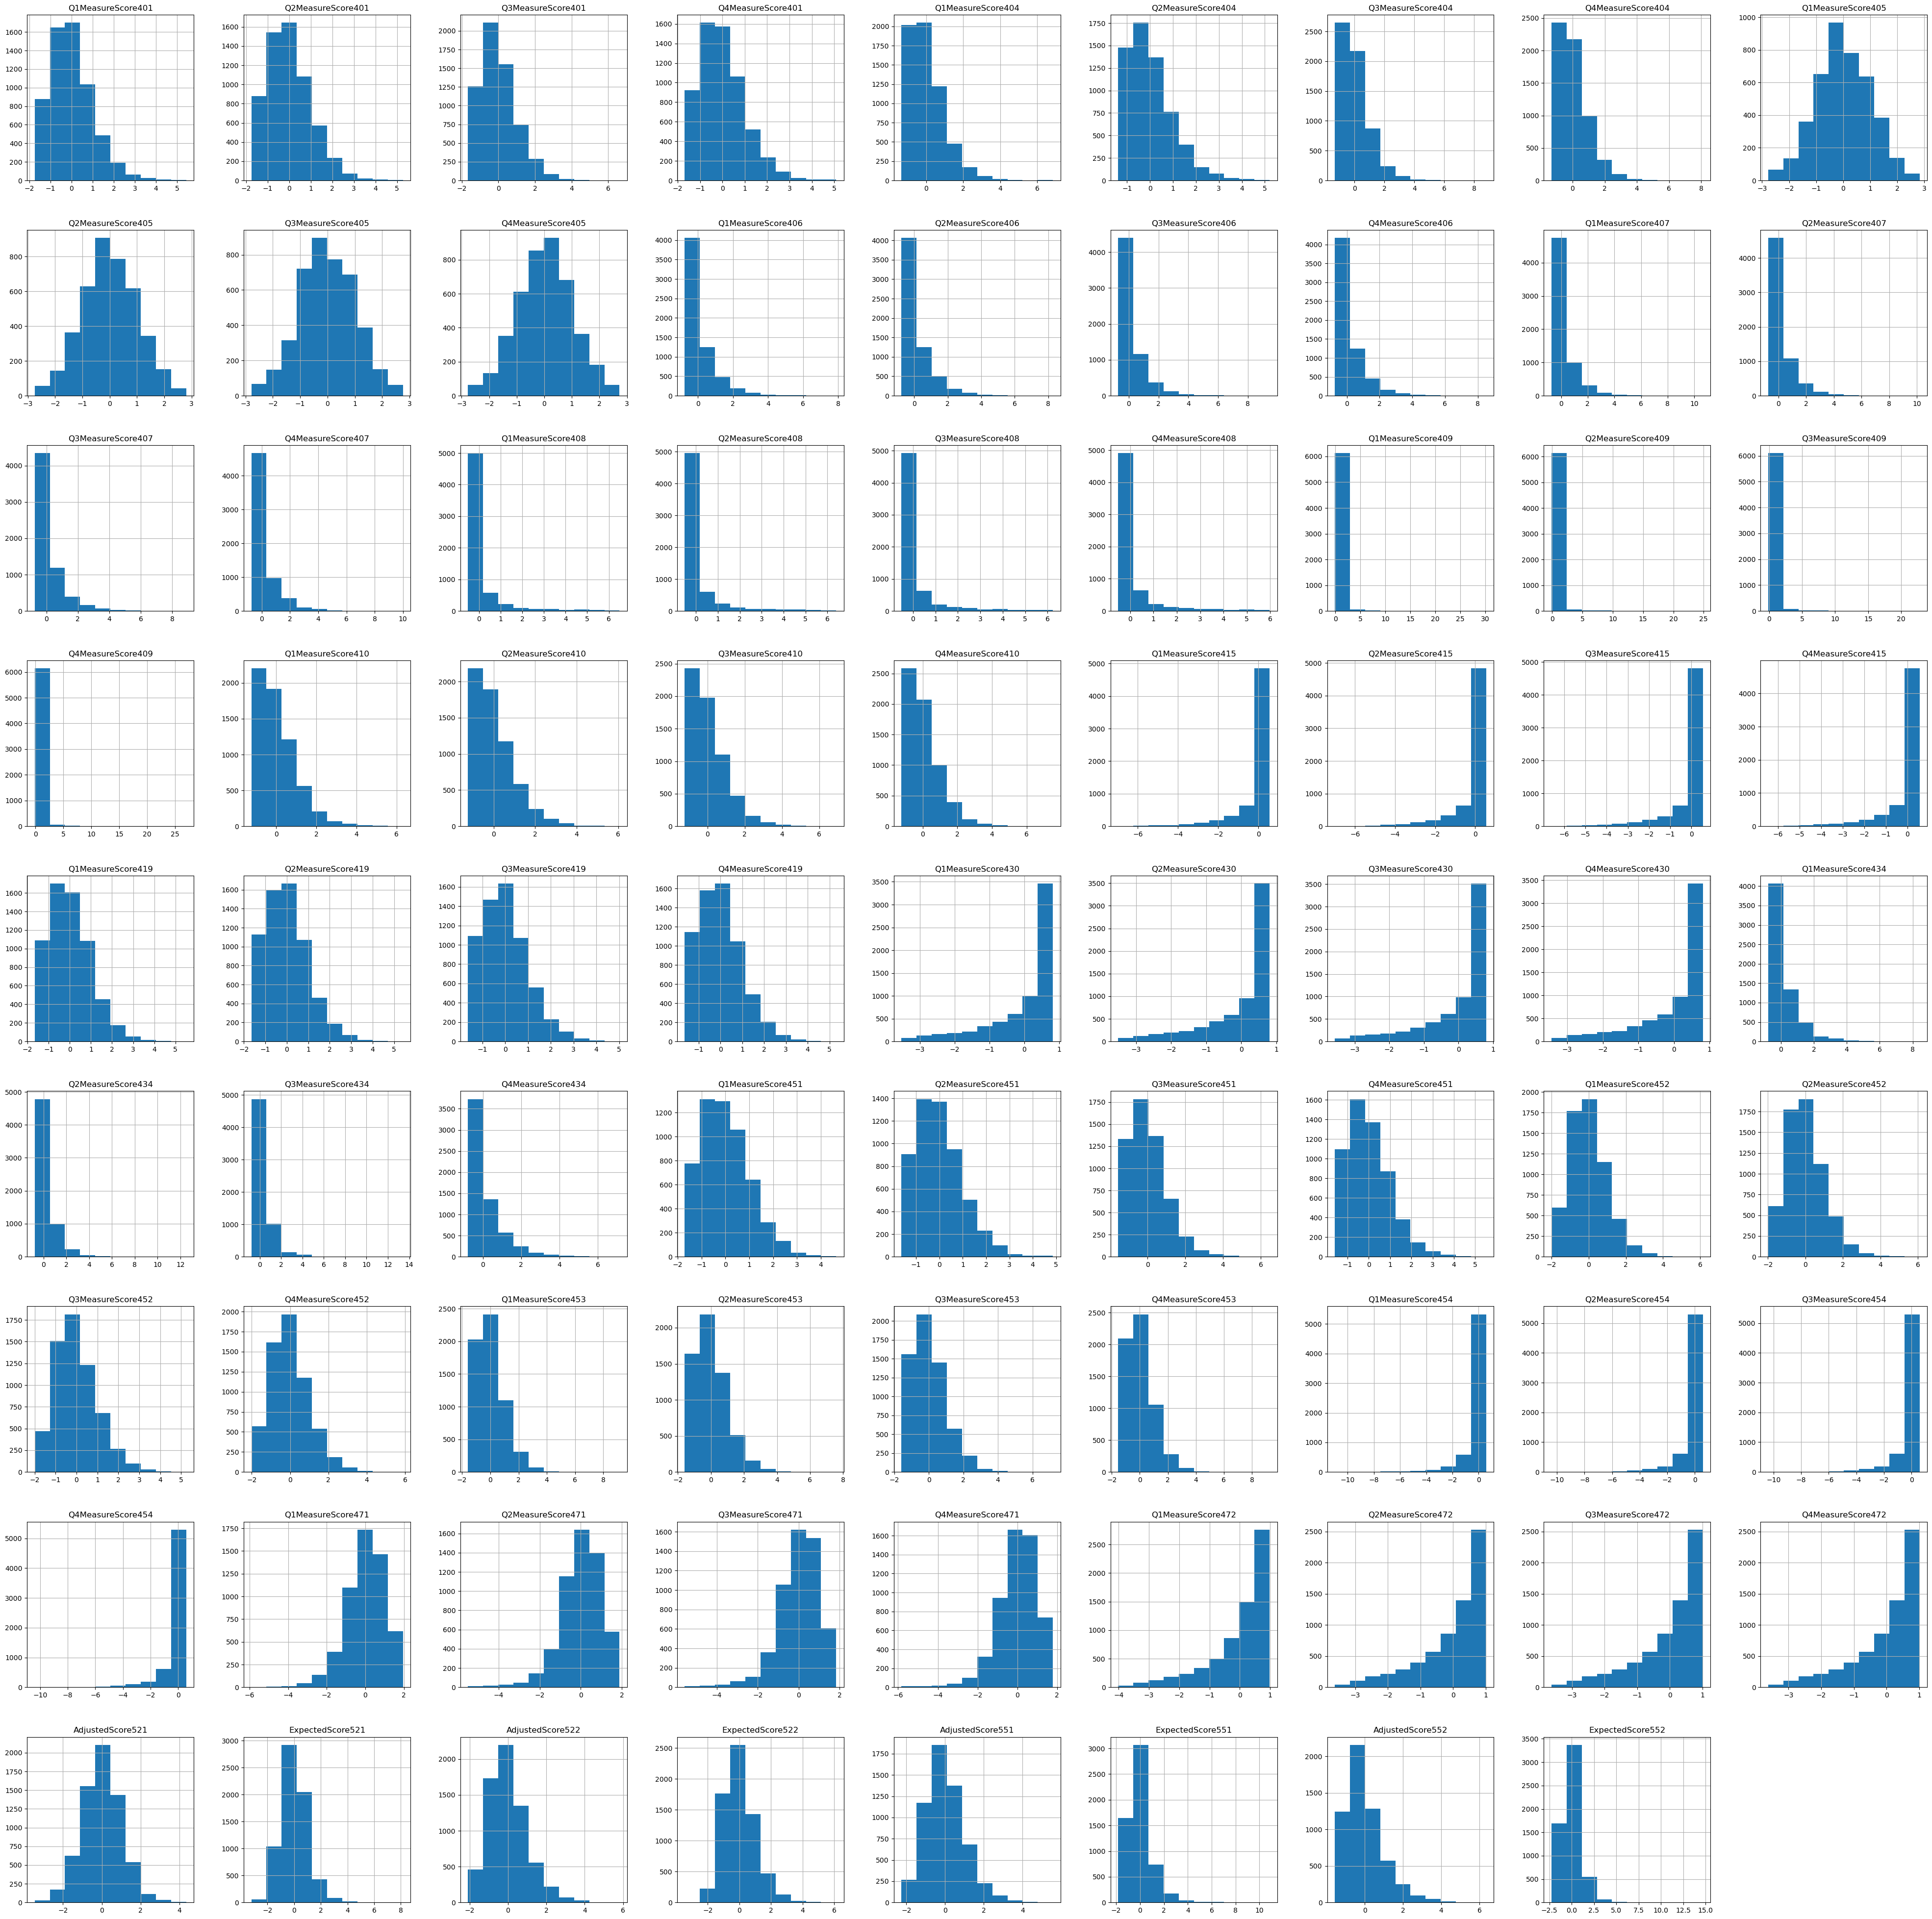

In [15]:
#starting histograms for our data
trainDF.loc[:,hasNA].hist(figsize = (50,50))

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
meanImputedData = trainDF.copy()

imputer.fit(meanImputedData.loc[:,hasNA])
meanImputedData.loc[:,hasNA] = imputer.transform(meanImputedData.loc[:,hasNA])

In [17]:
meanImputedData.isnull().sum().sum()

0

And the resulting distributions after imputation:

array([[<AxesSubplot:title={'center':'Q1MeasureScore401'}>,
        <AxesSubplot:title={'center':'Q2MeasureScore401'}>,
        <AxesSubplot:title={'center':'Q3MeasureScore401'}>,
        <AxesSubplot:title={'center':'Q4MeasureScore401'}>,
        <AxesSubplot:title={'center':'Q1MeasureScore404'}>,
        <AxesSubplot:title={'center':'Q2MeasureScore404'}>,
        <AxesSubplot:title={'center':'Q3MeasureScore404'}>,
        <AxesSubplot:title={'center':'Q4MeasureScore404'}>,
        <AxesSubplot:title={'center':'Q1MeasureScore405'}>],
       [<AxesSubplot:title={'center':'Q2MeasureScore405'}>,
        <AxesSubplot:title={'center':'Q3MeasureScore405'}>,
        <AxesSubplot:title={'center':'Q4MeasureScore405'}>,
        <AxesSubplot:title={'center':'Q1MeasureScore406'}>,
        <AxesSubplot:title={'center':'Q2MeasureScore406'}>,
        <AxesSubplot:title={'center':'Q3MeasureScore406'}>,
        <AxesSubplot:title={'center':'Q4MeasureScore406'}>,
        <AxesSubplot:title={'center':'Q

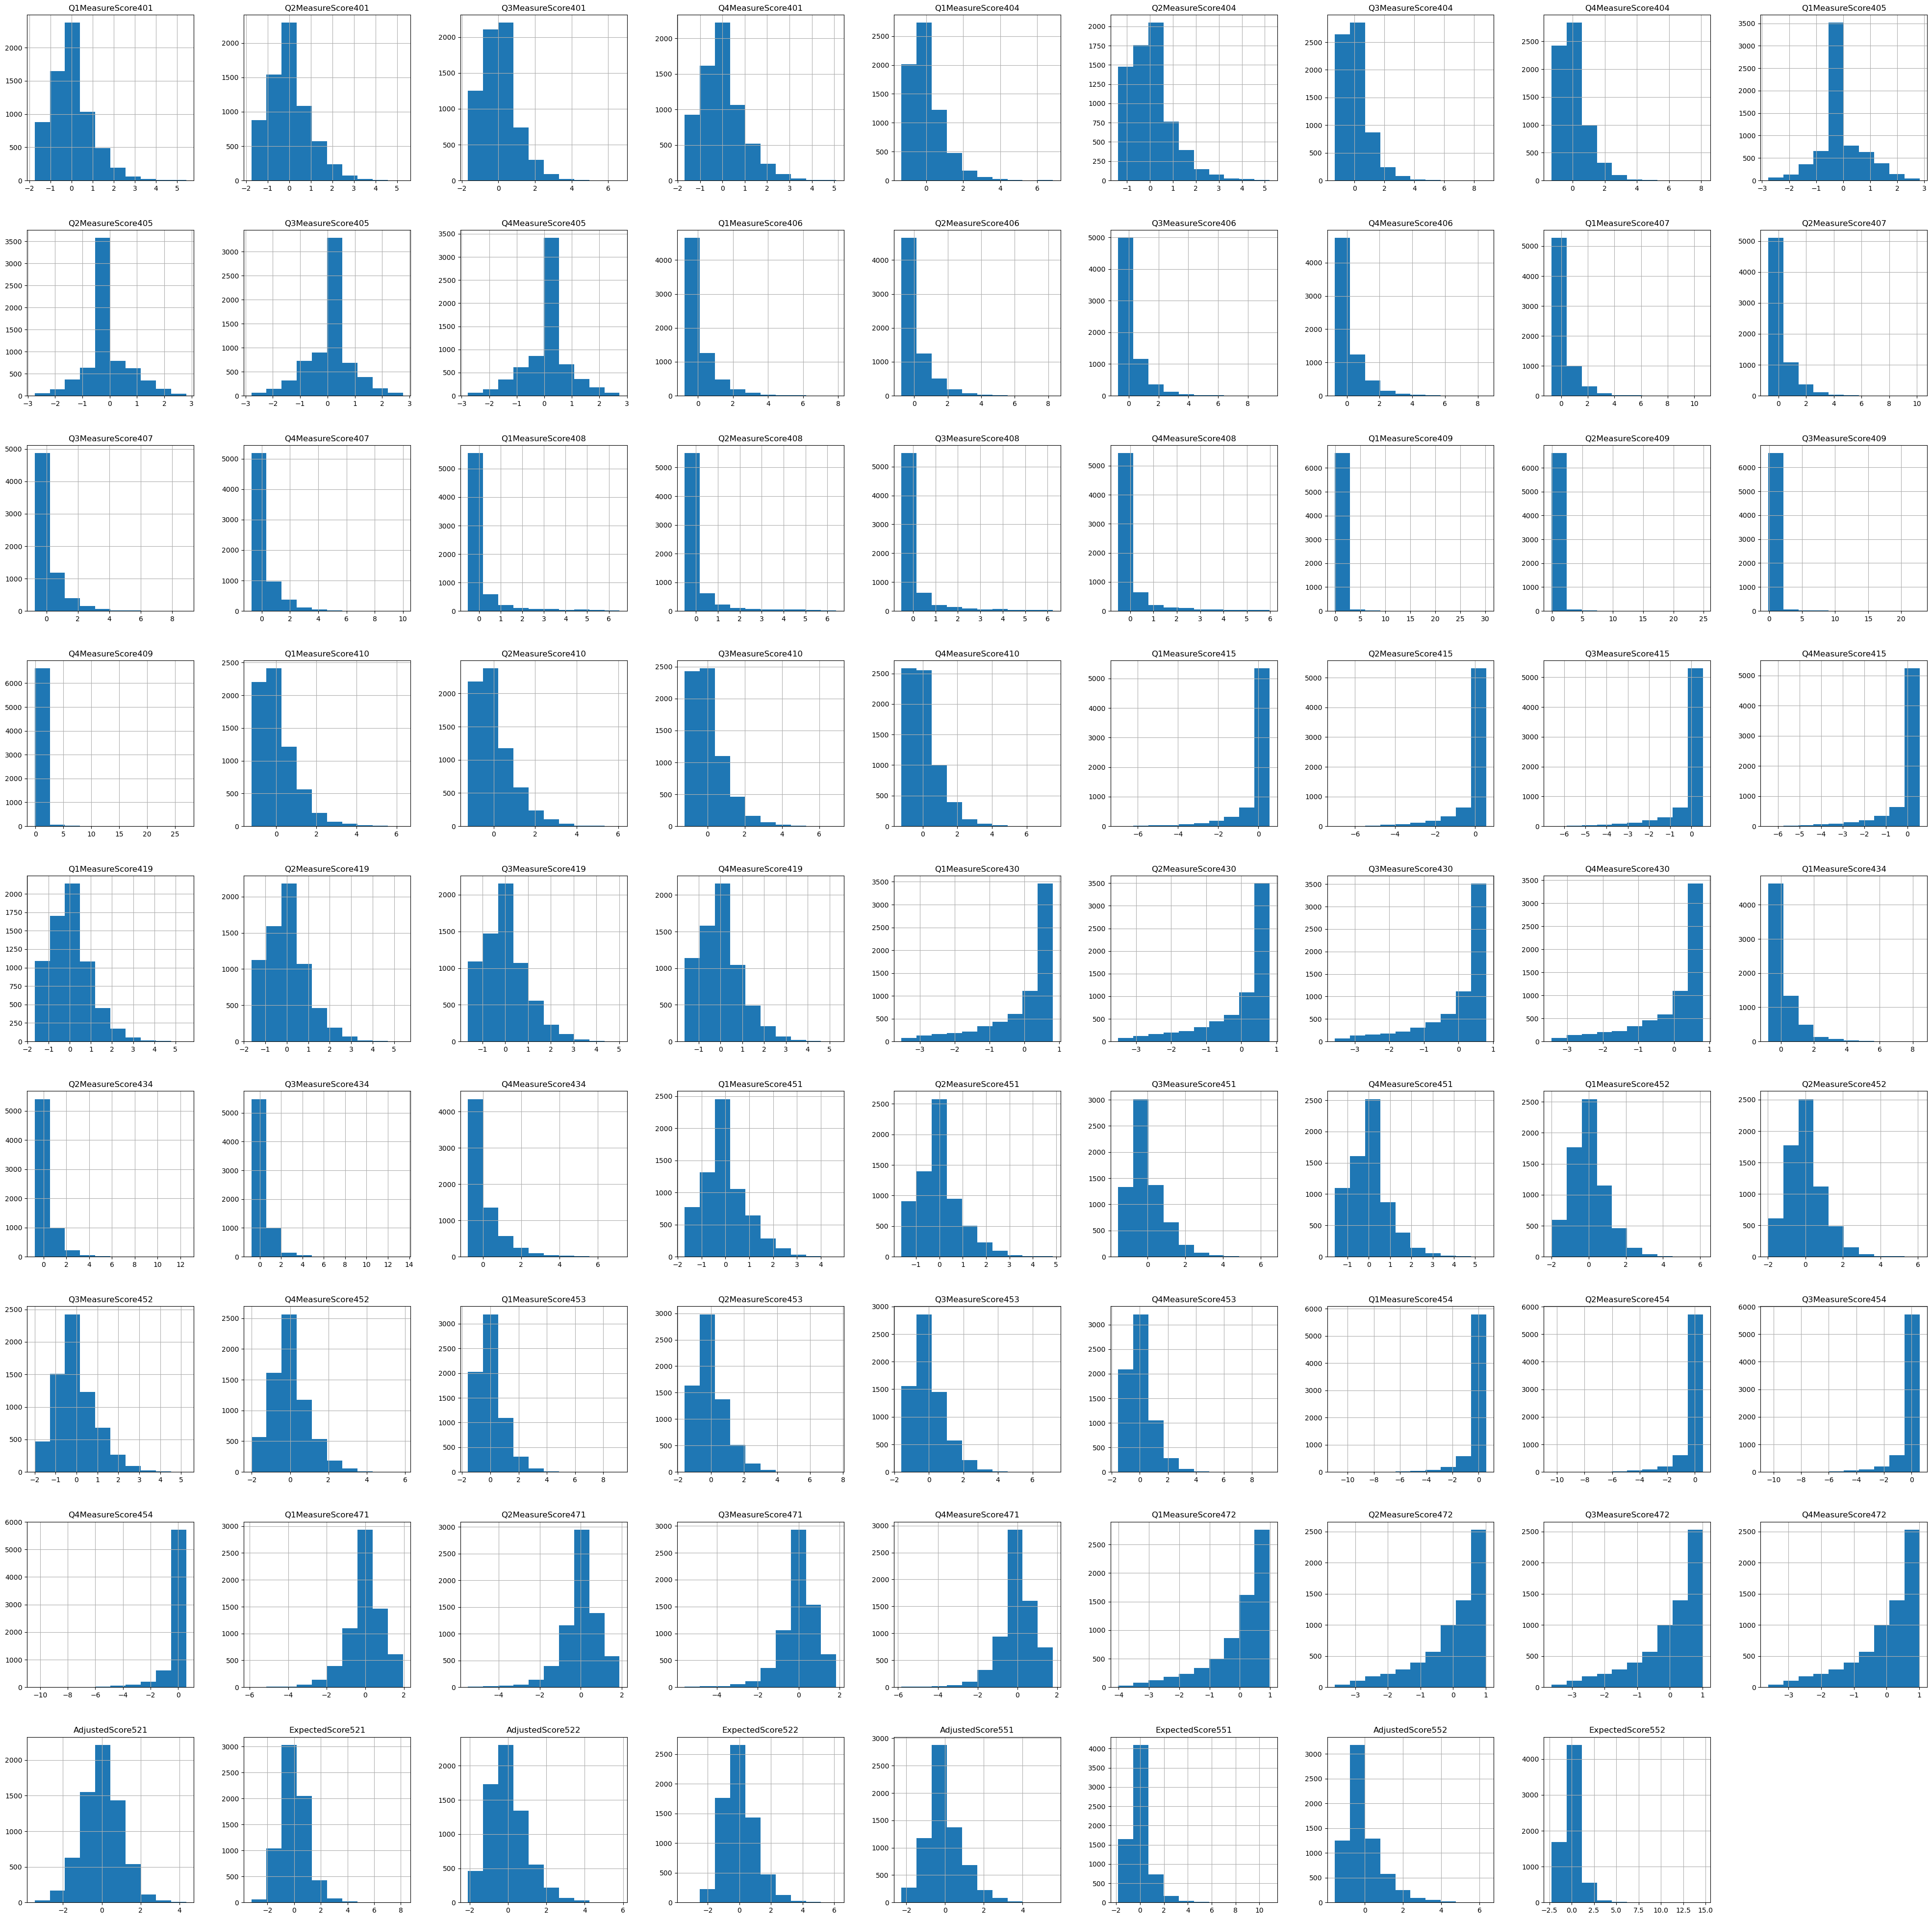

In [18]:
#resulting histograms
meanImputedData.loc[:,hasNA].hist(figsize = (50,50))

While most of the distributions look pretty similar, some have changed quite considerably.
Lets see if a more complicated imputation scheme can perform better, in this case scikit-learns KNN imputer

.hist(figsize = (50,50))

In [19]:
KNNimp = KNNImputer(n_neighbors=2)
KNNImputedData = trainDF.copy()

KNNimp.fit(KNNImputedData.loc[:,hasNA])
KNNImputedData.loc[:,hasNA] = KNNimp.transform(KNNImputedData.loc[:,hasNA])

array([[<AxesSubplot:title={'center':'Q1MeasureScore401'}>,
        <AxesSubplot:title={'center':'Q2MeasureScore401'}>,
        <AxesSubplot:title={'center':'Q3MeasureScore401'}>,
        <AxesSubplot:title={'center':'Q4MeasureScore401'}>,
        <AxesSubplot:title={'center':'Q1MeasureScore404'}>,
        <AxesSubplot:title={'center':'Q2MeasureScore404'}>,
        <AxesSubplot:title={'center':'Q3MeasureScore404'}>,
        <AxesSubplot:title={'center':'Q4MeasureScore404'}>,
        <AxesSubplot:title={'center':'Q1MeasureScore405'}>],
       [<AxesSubplot:title={'center':'Q2MeasureScore405'}>,
        <AxesSubplot:title={'center':'Q3MeasureScore405'}>,
        <AxesSubplot:title={'center':'Q4MeasureScore405'}>,
        <AxesSubplot:title={'center':'Q1MeasureScore406'}>,
        <AxesSubplot:title={'center':'Q2MeasureScore406'}>,
        <AxesSubplot:title={'center':'Q3MeasureScore406'}>,
        <AxesSubplot:title={'center':'Q4MeasureScore406'}>,
        <AxesSubplot:title={'center':'Q

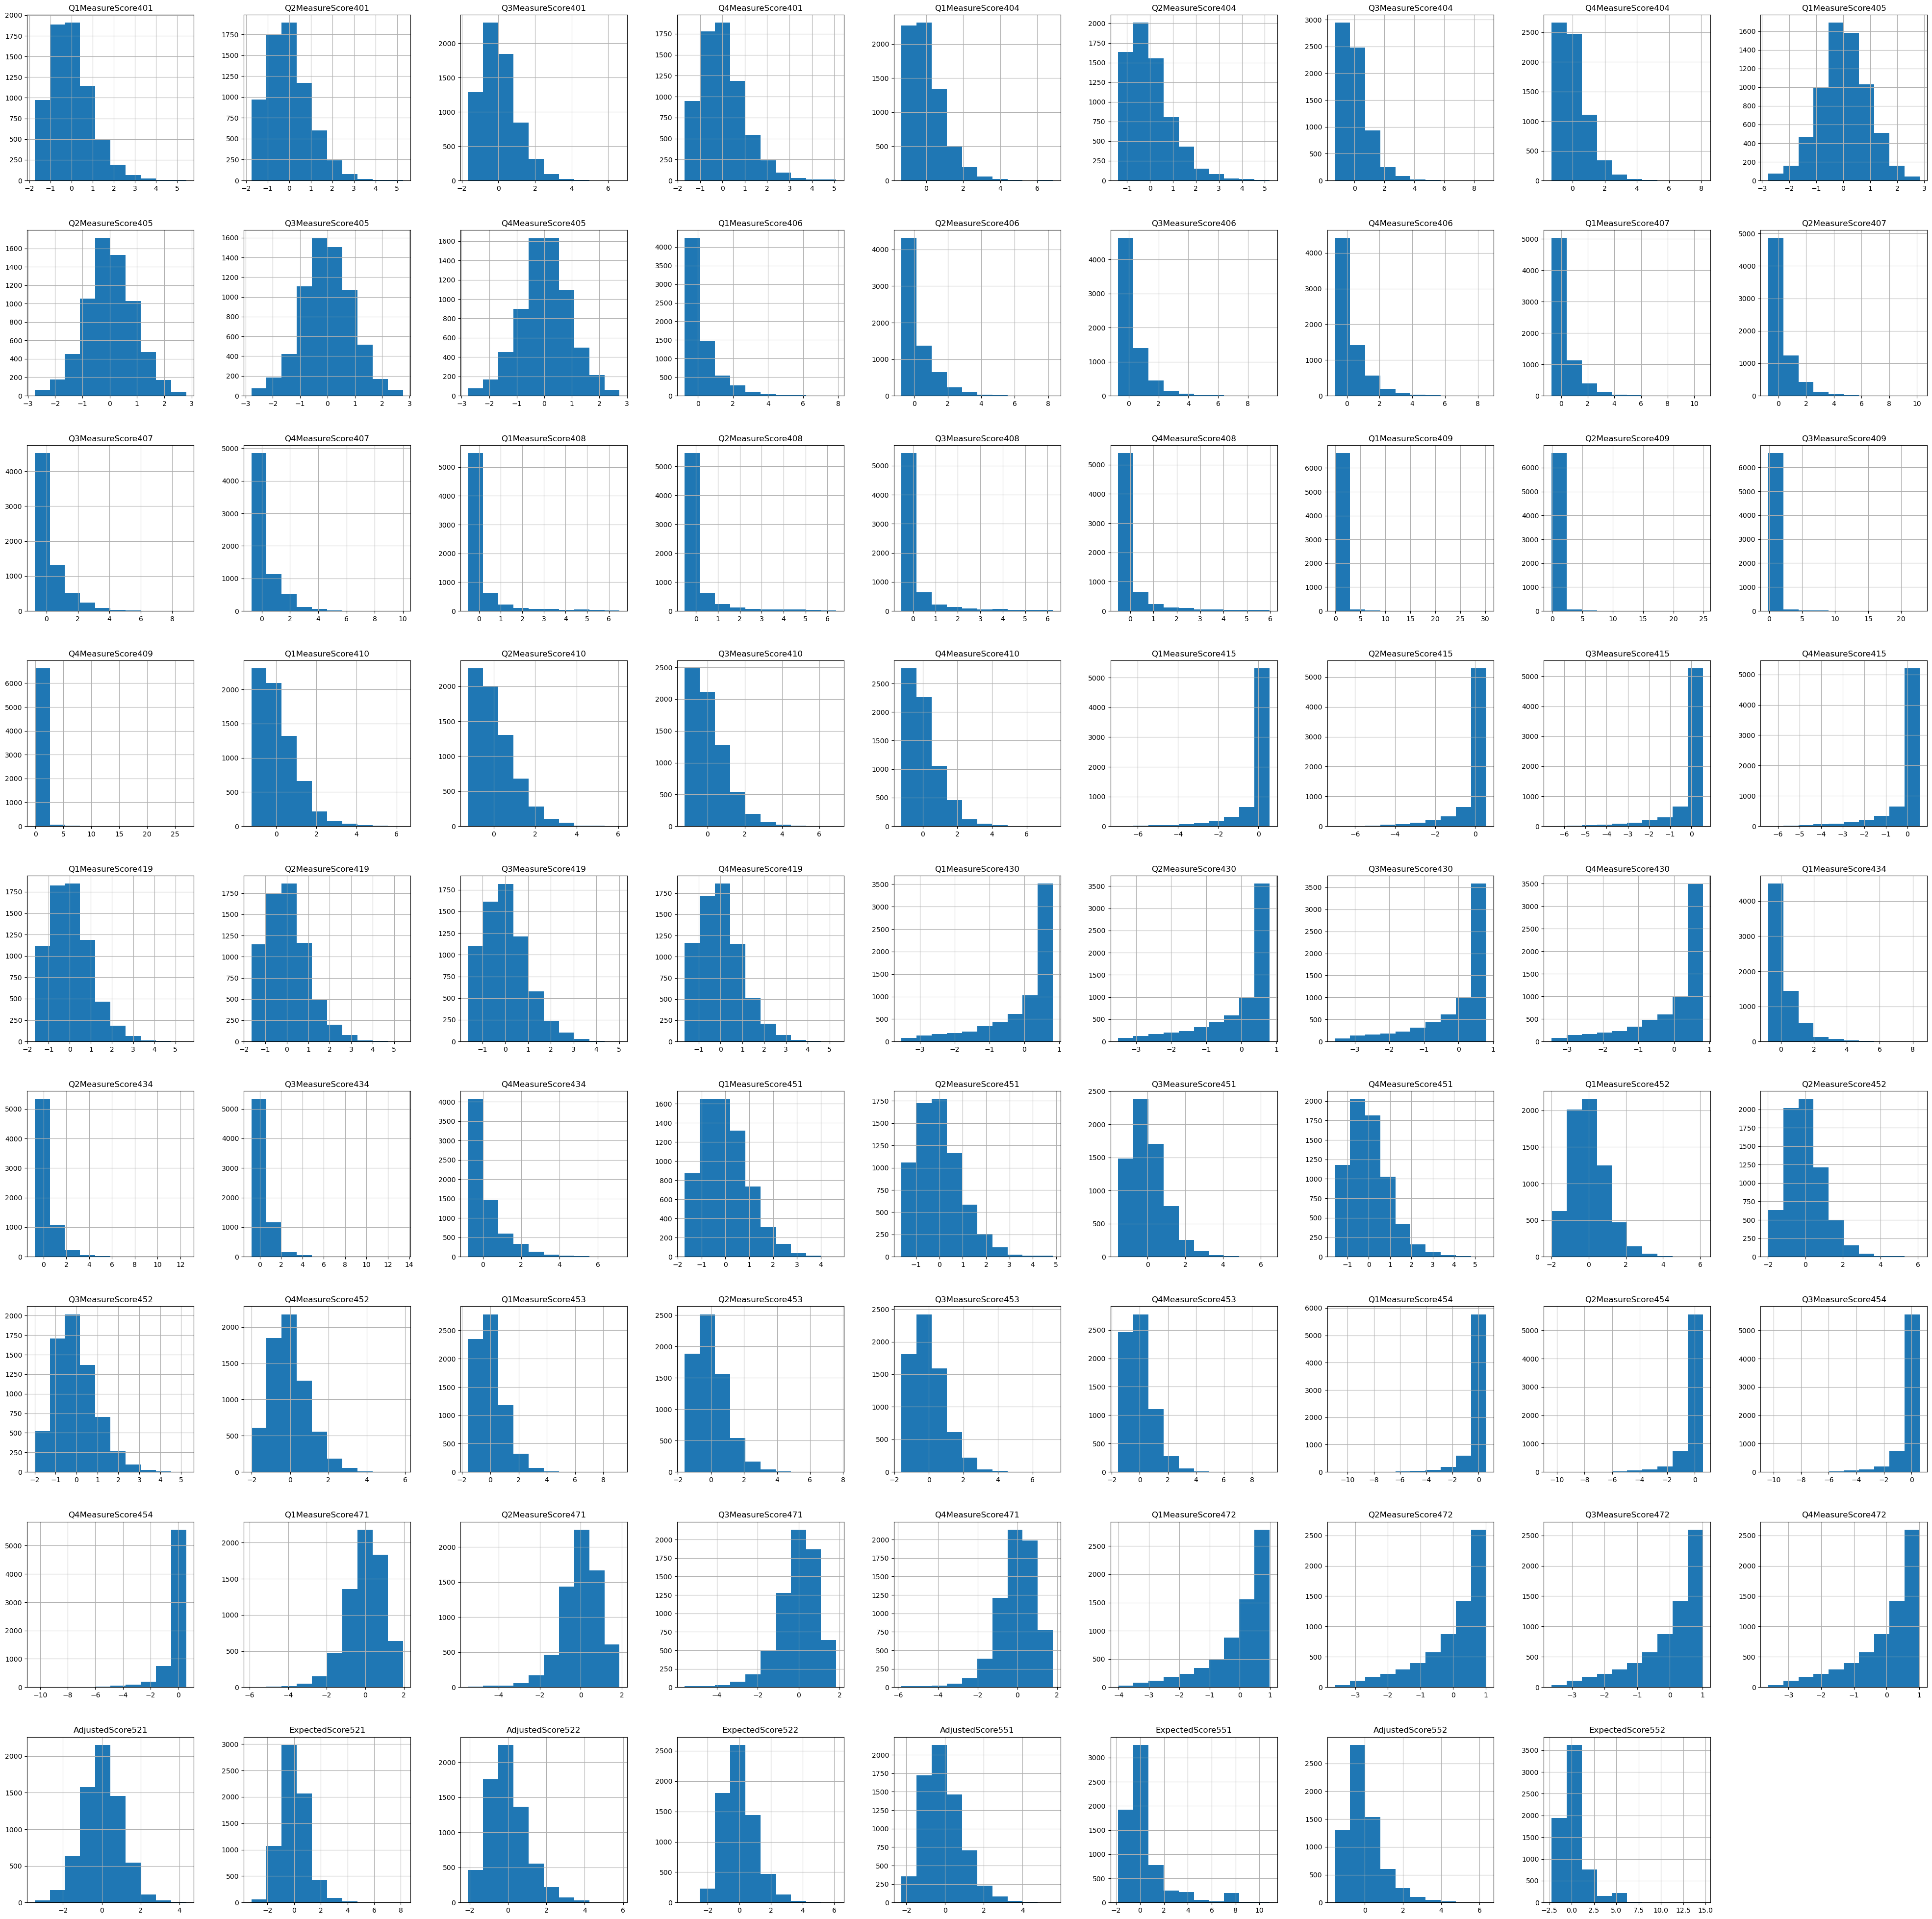

In [20]:
KNNImputedData.loc[:,hasNA].hist(figsize = (50,50))

KNN imputed data looks a little more consistent with the initial data

While were at it we can take a look at the rest of our data

array([[<AxesSubplot:title={'center':'fineCounts'}>,
        <AxesSubplot:title={'center':'paymentDenialCounts'}>,
        <AxesSubplot:title={'center':'StandardDeficiency'}>],
       [<AxesSubplot:title={'center':'ComplaintDeficiency'}>,
        <AxesSubplot:title={'center':'InfectionControlInspectionDeficiency'}>,
        <AxesSubplot:title={'center':'CitationunderIDR'}>],
       [<AxesSubplot:title={'center':'CitationunderIIDR'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

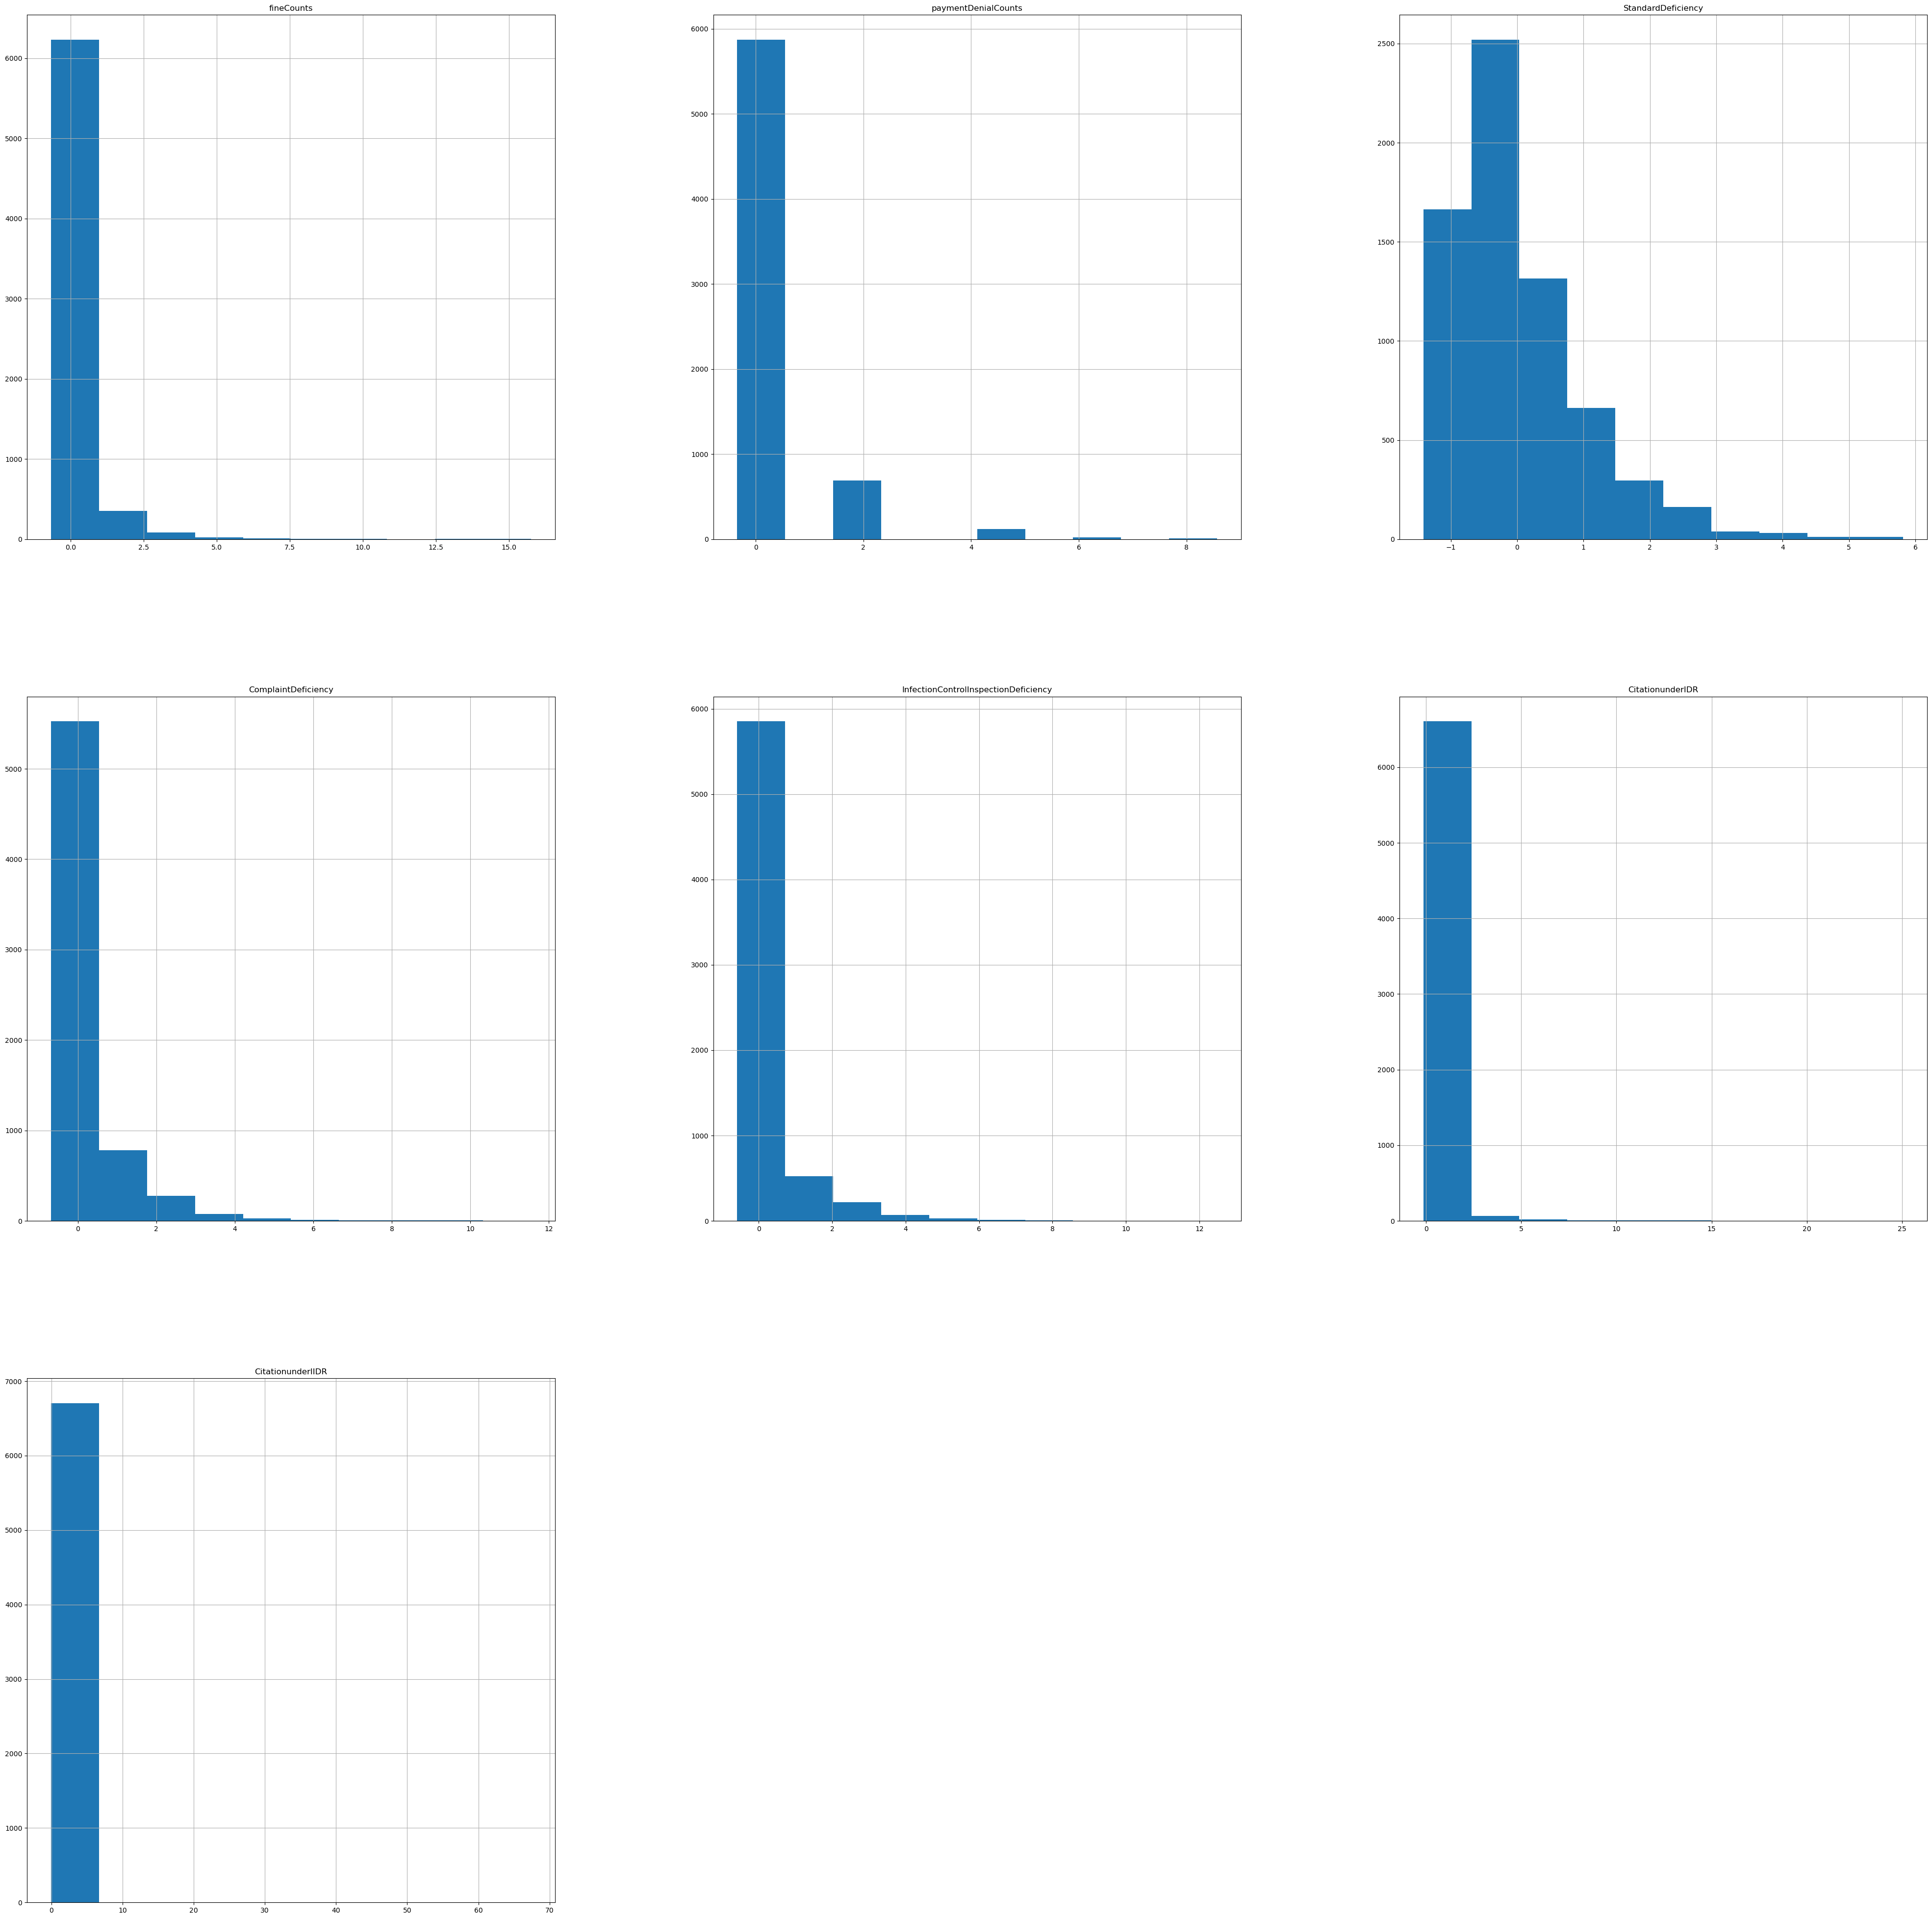

In [21]:
KNNImputedData.loc[:,noNA].hist(figsize = (50,50))

we have a lot of matricies, we can see that a lot of the distributions look similar, and as such may be linearly correlated. We can perform PCA to know which features are likely to add little information to our model. First check if our matrix is sparce, as scikit-learn's PCA requires a non-sparce matrix.

In [22]:
trainDF = KNNImputedData
sparse.issparse(trainDF)

False

In [23]:
trainDF.shape

(6713, 89)

In [24]:
corrMatrix = trainDF.corr()

<AxesSubplot:>

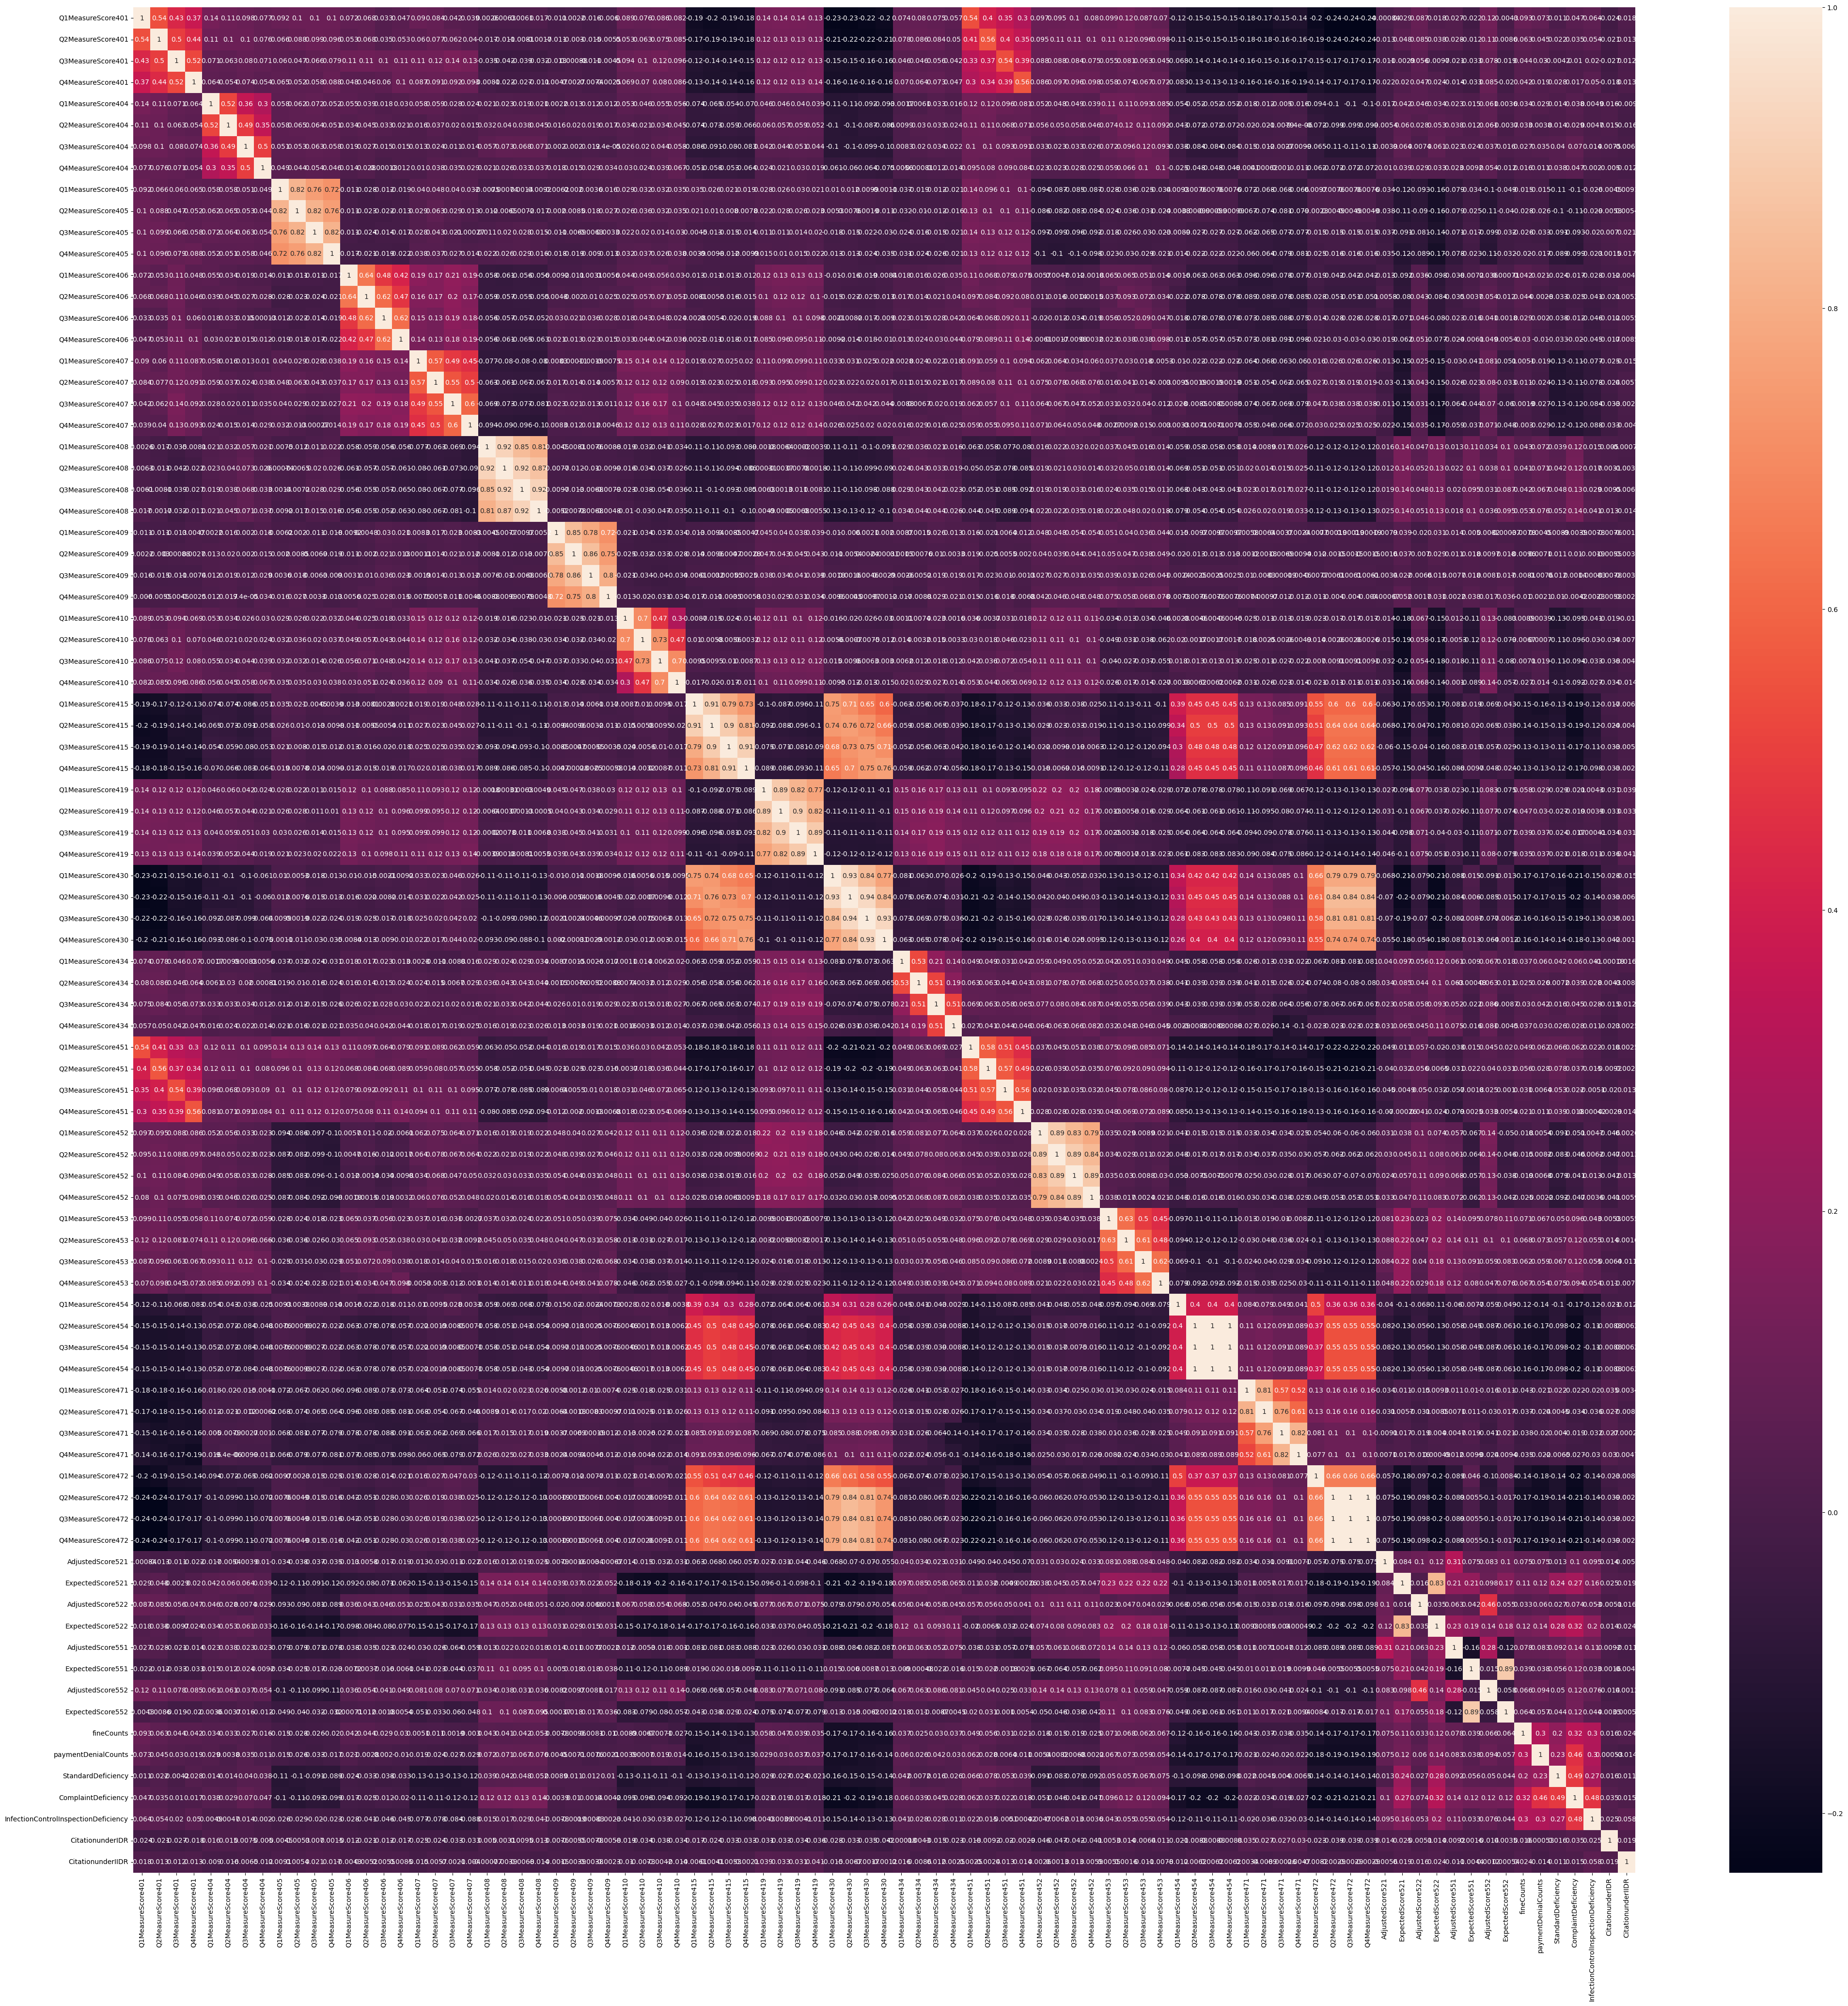

In [25]:
plt.figure(figsize=(50,50))
sn.heatmap(corrMatrix, annot=True)

From this we can see that there are mostly 4x4 blocks of correlation (the lighter the color, the higher the correlation), that is that the value of scores over 4 quarters are sometimes correlated, but that is not always the case.  
Having as much uncorrelated data as we have is a good sign that there is at least a lot of information in our data, although it does not necessarily explain what we want to model.
We can at least use PCA to remove a few correlated fields, although there will likely be quite a few leftover.

If we recall our initial data preparation we have 18 measure codes which we have 4 quarters of data for, giving us 72 features, and 4 measure codes which have adjusted and expected scores, so 8 more features there, plus 5 counts of deficiencies, 2 other count features, and finally our two target features adding up to 87 trainable features and 2 labels.
Below method based on: https://gist.github.com/rpromoditha/f73265e5a8db7084b521d79b2ecc3ece#file-pca_qas_2-py

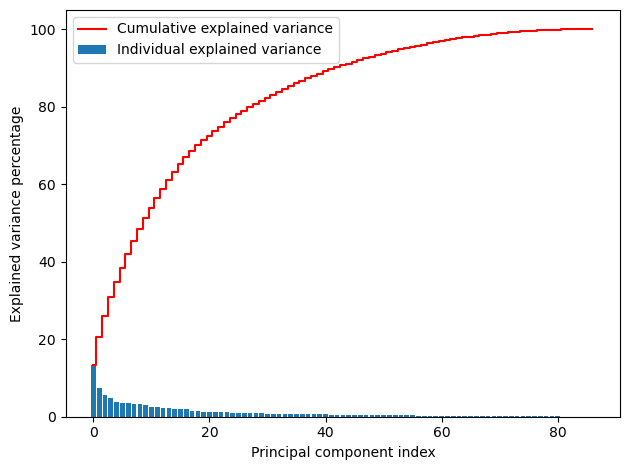

In [26]:
pca = PCA(n_components=None)
pca.fit(trainDF[numerics])

exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(87), exp_var, align='center',
        label='Individual explained variance')

plt.step(range(87), cum_exp_var, where='mid',
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

From this we can see that we have very little correlation between our features, as show in the above heatmap. However, as we have 87 features, each feature inhenrently adds little to the explentation. As we can see above we can remove a large number of features with small additions by specifying that we would like to keep the best features that have a cummulative 80% explenation of variance.

In [27]:
#80% variance - 29 features
pca = PCA(n_components=0.80)
pca.fit(trainDF[numerics])
trainX = pca.transform(trainDF[numerics])
print(trainX.shape)
trainY = trainDF[['InfectionScore', 'FacilityReadmissionScore']]
print(trainY.shape)

(6713, 29)
(6713, 2)


Our data is now prepared enough for modeling, we can make the above into a function and ensure we prepare our training and testing data in the same way

In [28]:
#returns train/test data split into features and labels in format: trainX, trainY, testX, testY
#target can be FacilityReadmissionScore or InfectionScore
#copied into a python file so it can be imported
#this is the initial process, updates may be made in the dataPrep.py file that are not from this process

def preprocessData(data, splitSeed = 0, target = 'FacilityReadmissionScore'):
    #import statements
    import pandas as pd
    import numpy as np
    from sklearn.impute import KNNImputer
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from scipy import sparse
    from sklearn.decomposition import PCA
    
    #drop rows without a target
    data.drop((data.loc[(data[target] == "Not Available")]).index, inplace = True)
    
    #split data into train and test
    trainDF, testDF = train_test_split(data, test_size = 0.3, random_state = splitSeed)
    
    #the count based column names saved to a list
    countsColumns = ["fineCounts", "paymentDenialCounts", "StandardDeficiency", "ComplaintDeficiency", "InfectionControlInspectionDeficiency", "CitationunderIDR", "CitationunderIIDR"]
    
    #replace count based nulls with zeroes
    trainDF[countsColumns] = trainDF[countsColumns].fillna(0)
    testDF[countsColumns] = testDF[countsColumns].fillna(0)
    
    #as we are using KNN imputing, we should scale numeric values between 0 and 1 first so distance measures are consistant
    numerics = trainDF.select_dtypes(include='float64').columns
    scaler = StandardScaler()
    scaler.fit(trainDF[numerics])
    trainDF[numerics] = scaler.transform(trainDF[numerics])
    testDF[numerics] = scaler.transform(testDF[numerics])
    
    
    #impute null values with KNN imputer
    noNA = (trainDF.isnull().sum() == 0).tolist()
    hasNA = np.logical_not(noNA)
    
    KNNimp = KNNImputer(n_neighbors=2)
    KNNimp.fit(trainDF.loc[:,hasNA])
    trainDF.loc[:,hasNA] = KNNimp.transform(trainDF.loc[:,hasNA])
    testDF.loc[:,hasNA] = KNNimp.transform(testDF.loc[:,hasNA])
    
    #Perform PCA, separate train and test data
    pca = PCA(n_components=0.80)
    pca.fit(trainDF[numerics])
    trainX = pca.transform(trainDF[numerics])
    testX = pca.transform(testDF[numerics])
    trainY = trainDF[target]
    testY = testDF[target]
        
    return trainX, trainY, testX, testY

In [29]:
trainX_fromFunction, trainY_fromFunction, testX_fromFunction, testY_fromFunction = preprocessData(nursingHomeDF)

In [30]:
np.array_equal(trainX_fromFunction, trainX)

True